In [21]:
#IMPORTS HERE:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as display

In [28]:
pd.set_option('display.max_columns', None)

column_names = ["Week", "Team", "Day", "Date", "Time", "Link", "Result", "OT",  
        "Rec", "H/A", "Opp", "Score_Tm", "Score_Opp", 
        "Off_1stD", "Off_TotYd", "Off_PassY", "Off_RushY", "Off_TO", 
        "Def_1stD", "Def_TotYd", "Def_PassY", "Def_RushY", "Def_TO", 
        "Exp_Offense", "Exp_Defense", "Exp_SpecTms"]

data1 = pd.read_csv('2021data.csv', skiprows=3, names=column_names)

data1 = data1[data1['Result'].isin(['W', 'L', 'T'])]

data1.drop(columns=['Link', 'Opp'], inplace=True)

data1['OT'] = data1['OT'].apply(lambda x: 'Yes' if x == 'OT' else 'No')
data1['H/A'] = data1['H/A'].apply(lambda x: 'Away' if x == '@' else 'Home')

cols_to_fill = [col for col in data1.columns if col.startswith(('Score', 'Off', 'Def', 'Exp'))]
data1[cols_to_fill] = data1[cols_to_fill].fillna(0)

data1['Week'] = pd.to_numeric(data1['Week'], errors='coerce')
data1 = data1.dropna(subset=['Week'])

rec_split = data1['Rec'].str.split('-', expand=True)
if len(rec_split.columns) == 2:
    rec_split[2] = '0'
rec_split.columns = ['Win', 'Loss', 'Tie']
data1[['Win', 'Loss', 'Tie']] = rec_split

# Replace non-numeric values in 'Win', 'Loss', and 'Tie' columns with 0
data1[['Win', 'Loss', 'Tie']] = data1[['Win', 'Loss', 'Tie']].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

data1 = data1.drop(columns=['Rec'])

In [27]:
data1

,Week,Team,Day,Date,Time,Result,OT,H/A,Score_Tm,Score_Opp,Off_1stD,Off_TotYd,Off_PassY,Off_RushY,Off_TO,Def_1stD,Def_TotYd,Def_PassY,Def_RushY,Def_TO,Exp_Offense,Exp_Defense,Exp_SpecTms,Win,Loss,Tie
0,3.0,49ers,Sun,26-Sep,8:20PM ET,L,No,Home,28.0,30.0,26.0,298.0,231.0,67.0,2.0,21.0,353.0,253.0,100.0,0.0,12.19,-15.14,0.95,1,0,0
1,4.0,49ers,Sun,3-Oct,4:05PM ET,L,No,Home,21.0,28.0,23.0,457.0,314.0,143.0,2.0,14.0,234.0,129.0,105.0,0.0,8.61,-2.20,-14.31,2,0,0
2,5.0,49ers,Sun,10-Oct,4:25PM ET,L,No,Away,10.0,17.0,19.0,338.0,186.0,152.0,1.0,20.0,304.0,210.0,94.0,1.0,-6.53,-1.74,-0.47,3,0,0
4,7.0,49ers,Sun,24-Oct,8:20PM ET,L,No,Home,18.0,30.0,13.0,280.0,169.0,111.0,4.0,17.0,295.0,147.0,148.0,2.0,-15.30,-1.16,4.24,4,0,0
5,8.0,49ers,Sun,31-Oct,1:00PM ET,W,No,Away,33.0,22.0,21.0,467.0,322.0,145.0,0.0,22.0,324.0,148.0,176.0,1.0,21.75,-9.87,-2.14,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,14.0,vikings,Thu,9-Dec,8:20PM ET,W,No,Home,36.0,28.0,22.0,458.0,216.0,242.0,2.0,22.0,375.0,269.0,106.0,1.0,8.68,-6.41,1.31,7,0,0
610,15.0,vikings,Mon,20-Dec,8:15PM ET,W,No,Away,17.0,9.0,13.0,193.0,61.0,132.0,1.0,24.0,370.0,255.0,115.0,3.0,-4.65,7.72,5.92,7,0,0
611,16.0,vikings,Sun,26-Dec,1:00PM ET,L,No,Home,23.0,30.0,19.0,361.0,295.0,66.0,1.0,22.0,356.0,197.0,159.0,3.0,-1.81,0.84,-7.80,8,0,0
612,17.0,vikings,Sun,2-Jan,8:20PM ET,L,No,Away,10.0,37.0,11.0,206.0,179.0,27.0,0.0,29.0,481.0,307.0,174.0,0.0,-13.56,-21.96,7.80,9,0,0


In [47]:
pd.set_option('display.max_columns', None)

column_names = ["Week", "Team", "Day", "Date", "Time", "Link", "Result", "OT",  
        "Rec", "H/A", "Opp", "Score_Tm", "Score_Opp", 
        "Off_1stD", "Off_TotYd", "Off_PassY", "Off_RushY", "Off_TO", 
        "Def_1stD", "Def_TotYd", "Def_PassY", "Def_RushY", "Def_TO", 
        "Exp_Offense", "Exp_Defense", "Exp_SpecTms"]

data2 = pd.read_csv('2021data.csv', skiprows=3, names=column_names)

data2 = data2[data2['Result'].isin(['W', 'L', 'T'])]

data2.drop(columns=['Link', 'Opp'], inplace=True)

data2['OT'] = data2['OT'].apply(lambda x: 'Yes' if x == 'OT' else 'No')
data2['H/A'] = data2['H/A'].apply(lambda x: 'Away' if x == '@' else 'Home')

cols_to_fill = [col for col in data2.columns if col.startswith(('Score', 'Off', 'Def', 'Exp'))]
data2[cols_to_fill] = data2[cols_to_fill].fillna(0)

data2['Week'] = pd.to_numeric(data2['Week'], errors='coerce')
data2 = data2.dropna(subset=['Week'])

rec_split = data2['Rec'].str.split('-', expand=True)
if len(rec_split.columns) == 2:
    rec_split[2] = '0'
rec_split.columns = ['Win', 'Loss', 'Tie']
data2[['Win', 'Loss', 'Tie']] = rec_split

# Replace non-numeric values in 'Win', 'Loss', and 'Tie' columns with 0
data2[['Win', 'Loss', 'Tie']] = data2[['Win', 'Loss', 'Tie']].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

data2 = data2.drop(columns=['Rec'])

In [33]:
data2

,Week,Team,Day,Date,Time,Result,OT,H/A,Score_Tm,Score_Opp,Off_1stD,Off_TotYd,Off_PassY,Off_RushY,Off_TO,Def_1stD,Def_TotYd,Def_PassY,Def_RushY,Def_TO,Exp_Offense,Exp_Defense,Exp_SpecTms,Win,Loss,Tie
0,3.0,49ers,Sun,26-Sep,8:20PM ET,L,No,Home,28.0,30.0,26.0,298.0,231.0,67.0,2.0,21.0,353.0,253.0,100.0,0.0,12.19,-15.14,0.95,1,0,0
1,4.0,49ers,Sun,3-Oct,4:05PM ET,L,No,Home,21.0,28.0,23.0,457.0,314.0,143.0,2.0,14.0,234.0,129.0,105.0,0.0,8.61,-2.20,-14.31,2,0,0
2,5.0,49ers,Sun,10-Oct,4:25PM ET,L,No,Away,10.0,17.0,19.0,338.0,186.0,152.0,1.0,20.0,304.0,210.0,94.0,1.0,-6.53,-1.74,-0.47,3,0,0
4,7.0,49ers,Sun,24-Oct,8:20PM ET,L,No,Home,18.0,30.0,13.0,280.0,169.0,111.0,4.0,17.0,295.0,147.0,148.0,2.0,-15.30,-1.16,4.24,4,0,0
5,8.0,49ers,Sun,31-Oct,1:00PM ET,W,No,Away,33.0,22.0,21.0,467.0,322.0,145.0,0.0,22.0,324.0,148.0,176.0,1.0,21.75,-9.87,-2.14,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,14.0,vikings,Thu,9-Dec,8:20PM ET,W,No,Home,36.0,28.0,22.0,458.0,216.0,242.0,2.0,22.0,375.0,269.0,106.0,1.0,8.68,-6.41,1.31,7,0,0
610,15.0,vikings,Mon,20-Dec,8:15PM ET,W,No,Away,17.0,9.0,13.0,193.0,61.0,132.0,1.0,24.0,370.0,255.0,115.0,3.0,-4.65,7.72,5.92,7,0,0
611,16.0,vikings,Sun,26-Dec,1:00PM ET,L,No,Home,23.0,30.0,19.0,361.0,295.0,66.0,1.0,22.0,356.0,197.0,159.0,3.0,-1.81,0.84,-7.80,8,0,0
612,17.0,vikings,Sun,2-Jan,8:20PM ET,L,No,Away,10.0,37.0,11.0,206.0,179.0,27.0,0.0,29.0,481.0,307.0,174.0,0.0,-13.56,-21.96,7.80,9,0,0


In [34]:
import pandas as pd

pd.set_option('display.max_columns', None)

column_names = ["Week", "Team", "Day", "Date", "Time", "Link", "Result", "OT",  
        "Rec", "H/A", "Opp", "Score_Tm", "Score_Opp", 
        "Off_1stD", "Off_TotYd", "Off_PassY", "Off_RushY", "Off_TO", 
        "Def_1stD", "Def_TotYd", "Def_PassY", "Def_RushY", "Def_TO", 
        "Exp_Offense", "Exp_Defense", "Exp_SpecTms"]

data3 = pd.read_csv('2021data.csv', skiprows=3, names=column_names)

data3 = data3[data3['Result'].isin(['W', 'L', 'T'])]

data3.drop(columns=['Link', 'Opp'], inplace=True)

data3['OT'] = data3['OT'].apply(lambda x: 'Yes' if x == 'OT' else 'No')
data3['H/A'] = data3['H/A'].apply(lambda x: 'Away' if x == '@' else 'Home')

cols_to_fill = [col for col in data3.columns if col.startswith(('Score', 'Off', 'Def', 'Exp'))]
data3[cols_to_fill] = data3[cols_to_fill].fillna(0)

data3['Week'] = pd.to_numeric(data3['Week'], errors='coerce')
data3 = data3.dropna(subset=['Week'])

rec_split = data3['Rec'].str.split('-', expand=True)
if len(rec_split.columns) == 2:
    rec_split[2] = '0'
rec_split.columns = ['Win', 'Loss', 'Tie']
data3[['Win', 'Loss', 'Tie']] = rec_split

# Replace non-numeric values in 'Win', 'Loss', and 'Tie' columns with 0
data3[['Win', 'Loss', 'Tie']] = data3[['Win', 'Loss', 'Tie']].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

data3 = data3.drop(columns=['Rec'])

In [35]:
data3

,Week,Team,Day,Date,Time,Result,OT,H/A,Score_Tm,Score_Opp,Off_1stD,Off_TotYd,Off_PassY,Off_RushY,Off_TO,Def_1stD,Def_TotYd,Def_PassY,Def_RushY,Def_TO,Exp_Offense,Exp_Defense,Exp_SpecTms,Win,Loss,Tie
0,3.0,49ers,Sun,26-Sep,8:20PM ET,L,No,Home,28.0,30.0,26.0,298.0,231.0,67.0,2.0,21.0,353.0,253.0,100.0,0.0,12.19,-15.14,0.95,1,0,0
1,4.0,49ers,Sun,3-Oct,4:05PM ET,L,No,Home,21.0,28.0,23.0,457.0,314.0,143.0,2.0,14.0,234.0,129.0,105.0,0.0,8.61,-2.20,-14.31,2,0,0
2,5.0,49ers,Sun,10-Oct,4:25PM ET,L,No,Away,10.0,17.0,19.0,338.0,186.0,152.0,1.0,20.0,304.0,210.0,94.0,1.0,-6.53,-1.74,-0.47,3,0,0
4,7.0,49ers,Sun,24-Oct,8:20PM ET,L,No,Home,18.0,30.0,13.0,280.0,169.0,111.0,4.0,17.0,295.0,147.0,148.0,2.0,-15.30,-1.16,4.24,4,0,0
5,8.0,49ers,Sun,31-Oct,1:00PM ET,W,No,Away,33.0,22.0,21.0,467.0,322.0,145.0,0.0,22.0,324.0,148.0,176.0,1.0,21.75,-9.87,-2.14,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,14.0,vikings,Thu,9-Dec,8:20PM ET,W,No,Home,36.0,28.0,22.0,458.0,216.0,242.0,2.0,22.0,375.0,269.0,106.0,1.0,8.68,-6.41,1.31,7,0,0
610,15.0,vikings,Mon,20-Dec,8:15PM ET,W,No,Away,17.0,9.0,13.0,193.0,61.0,132.0,1.0,24.0,370.0,255.0,115.0,3.0,-4.65,7.72,5.92,7,0,0
611,16.0,vikings,Sun,26-Dec,1:00PM ET,L,No,Home,23.0,30.0,19.0,361.0,295.0,66.0,1.0,22.0,356.0,197.0,159.0,3.0,-1.81,0.84,-7.80,8,0,0
612,17.0,vikings,Sun,2-Jan,8:20PM ET,L,No,Away,10.0,37.0,11.0,206.0,179.0,27.0,0.0,29.0,481.0,307.0,174.0,0.0,-13.56,-21.96,7.80,9,0,0


In [42]:
corr1 = data1.corr()

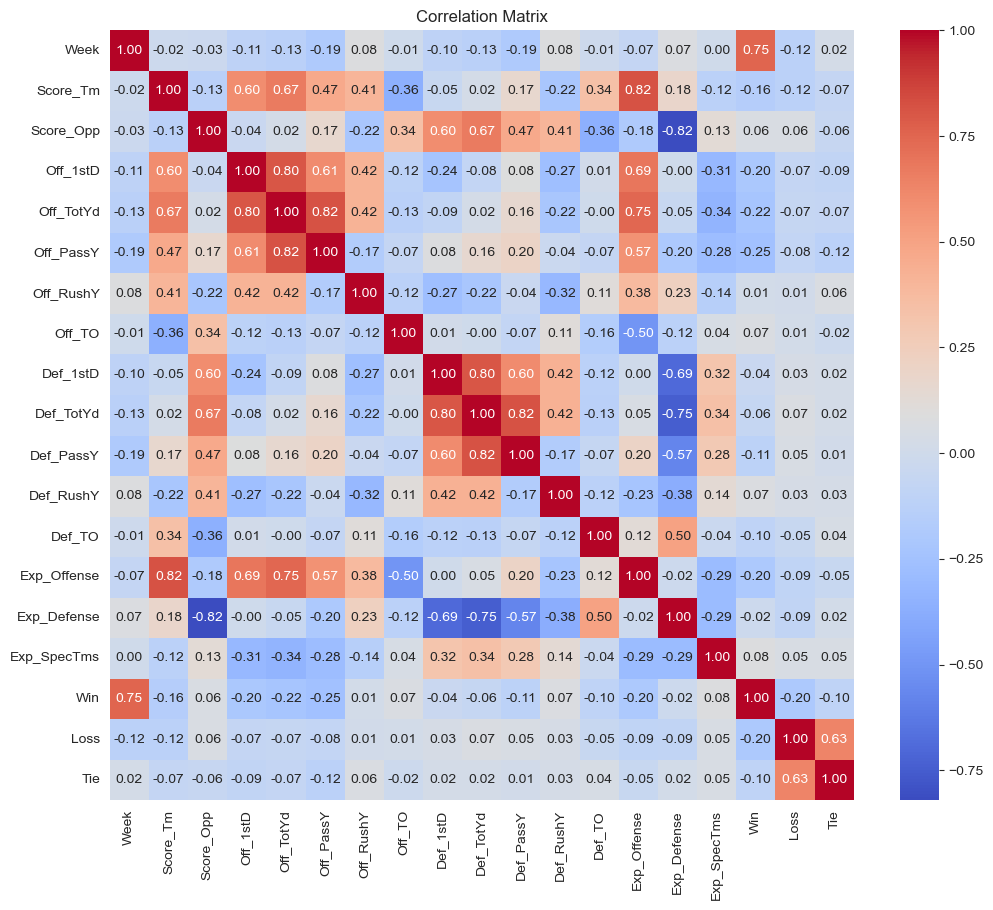

In [43]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [45]:
# Find and print the maximum correlation values that aren't 1
print("Maximum correlation values that aren't 1:")
for column in corr1.columns:
    max_corr = corr1[column][corr1[column] < 1].max()
    if not pd.isnull(max_corr):
        print(f"Max correlation for {column}: {max_corr:.2f}")

Maximum correlation values that aren't 1:
Max correlation for Week: 0.75
Max correlation for Score_Tm: 0.82
Max correlation for Score_Opp: 0.67
Max correlation for Off_1stD: 0.80
Max correlation for Off_TotYd: 0.82
Max correlation for Off_PassY: 0.82
Max correlation for Off_RushY: 0.42
Max correlation for Off_TO: 0.34
Max correlation for Def_1stD: 0.80
Max correlation for Def_TotYd: 0.82
Max correlation for Def_PassY: 0.82
Max correlation for Def_RushY: 0.42
Max correlation for Def_TO: 0.50
Max correlation for Exp_Offense: 0.82
Max correlation for Exp_Defense: 0.50
Max correlation for Exp_SpecTms: 0.34
Max correlation for Win: 0.75
Max correlation for Loss: 0.63
Max correlation for Tie: 0.63


In [46]:
# Find and print the maximum correlation values that aren't 1 along with the corresponding variables
print("Maximum correlation values that aren't 1:")
for column in corr1.columns:
    max_corr = corr1[column][corr1[column] < 1].max()
    if not pd.isnull(max_corr):
        correlated_variable = corr1[column][corr1[column] == max_corr].index[0]
        print(f"Max correlation for {column} with {correlated_variable}: {max_corr:.2f}")

Maximum correlation values that aren't 1:
Max correlation for Week with Win: 0.75
Max correlation for Score_Tm with Exp_Offense: 0.82
Max correlation for Score_Opp with Def_TotYd: 0.67
Max correlation for Off_1stD with Off_TotYd: 0.80
Max correlation for Off_TotYd with Off_PassY: 0.82
Max correlation for Off_PassY with Off_TotYd: 0.82
Max correlation for Off_RushY with Off_TotYd: 0.42
Max correlation for Off_TO with Score_Opp: 0.34
Max correlation for Def_1stD with Def_TotYd: 0.80
Max correlation for Def_TotYd with Def_PassY: 0.82
Max correlation for Def_PassY with Def_TotYd: 0.82
Max correlation for Def_RushY with Def_1stD: 0.42
Max correlation for Def_TO with Exp_Defense: 0.50
Max correlation for Exp_Offense with Score_Tm: 0.82
Max correlation for Exp_Defense with Def_TO: 0.50
Max correlation for Exp_SpecTms with Def_TotYd: 0.34
Max correlation for Win with Week: 0.75
Max correlation for Loss with Tie: 0.63
Max correlation for Tie with Loss: 0.63


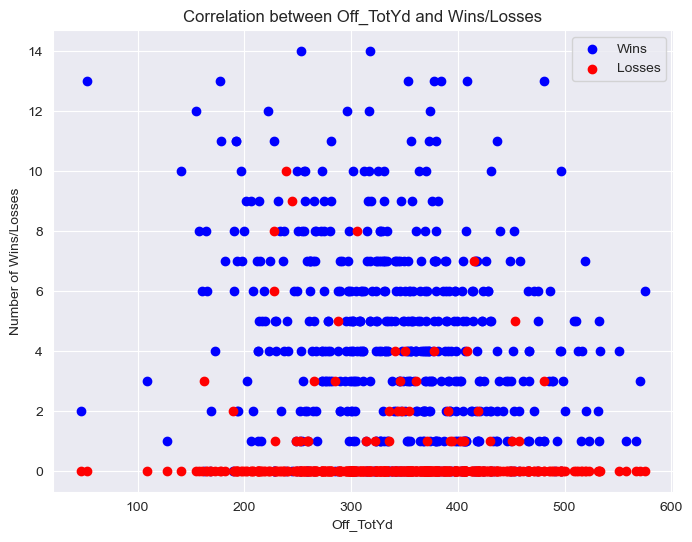

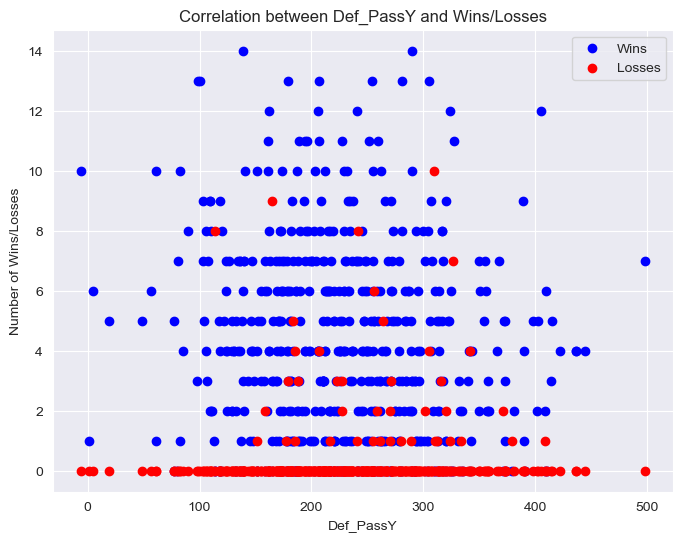

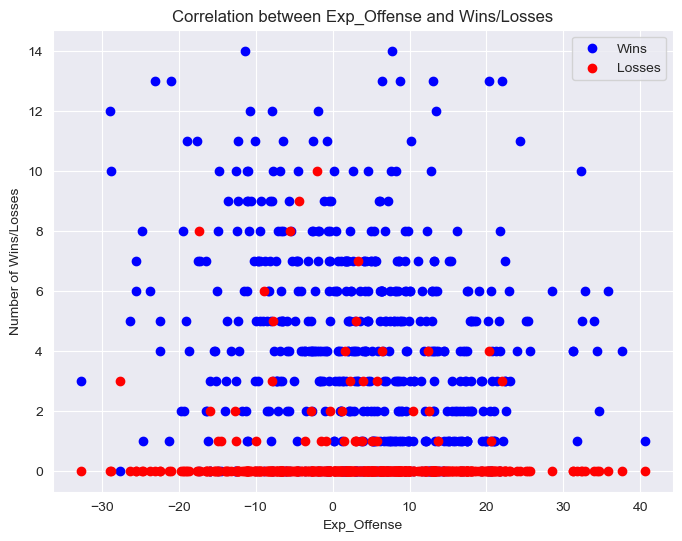

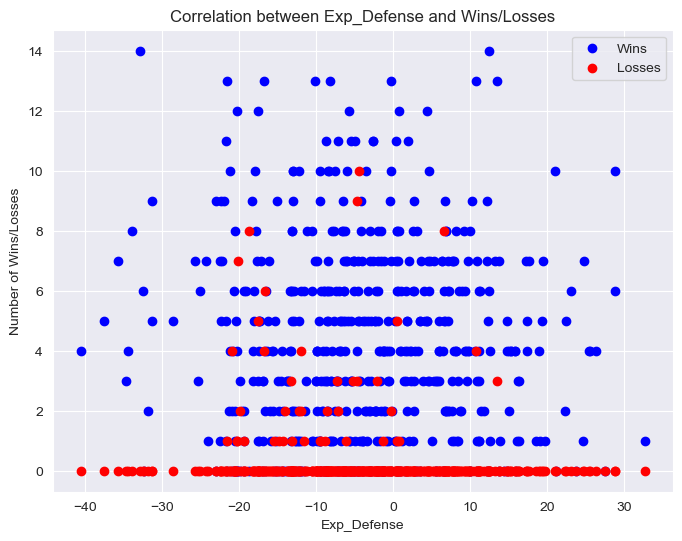

In [52]:
features = ['Off_TotYd', 'Def_PassY', 'Exp_Offense', 'Exp_Defense']

for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(data1[feature], data1['Win'], color='blue', label='Wins')
    plt.scatter(data1[feature], data1['Loss'], color='red', label='Losses')
    plt.xlabel(feature)
    plt.ylabel('Number of Wins/Losses')
    plt.title(f'Correlation between {feature} and Wins/Losses')
    plt.legend()
    plt.show()